## Adding Dependencies

In [25]:
# !pip3 install opencv-python
# !pip3 install tensorflow-gpu

In [26]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow as tf
import cv2 as cv
import pandas as pd
from random import shuffle
from sklearn import preprocessing
import tqdm
import numpy as np
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

## Reading Data in a directory and adding it to main memory

In [27]:
data = []
cat = []
i = 0
for folders in os.listdir('Dataset'):
    for files in os.listdir('Dataset/'+folders):
        path = 'Dataset/'+folders+'/'+files
        img = cv.imread(path)
        # print(img.shape)
        cat.append(folders)
        i+=1
        data.append(img/255)
    print(i)
    # i=0
data = np.asanyarray(data)

896
960
4160
6400


till now we have normalised our data in the range 0-1

In [28]:
le = preprocessing.LabelEncoder()
cat = le.fit_transform(cat)
print(le.classes_)
print(cat)
data.shape

['Mild_Demented' 'Moderate_Demented' 'Non_Demented' 'Very_Mild_Demented']
[0 0 0 ... 3 3 3]


(6400, 128, 128, 3)

In [29]:
fin_data = []
for i in range(len(data)):
    fin_data.append((cat[i],data[i]))

## Visualising images and processing our dataset

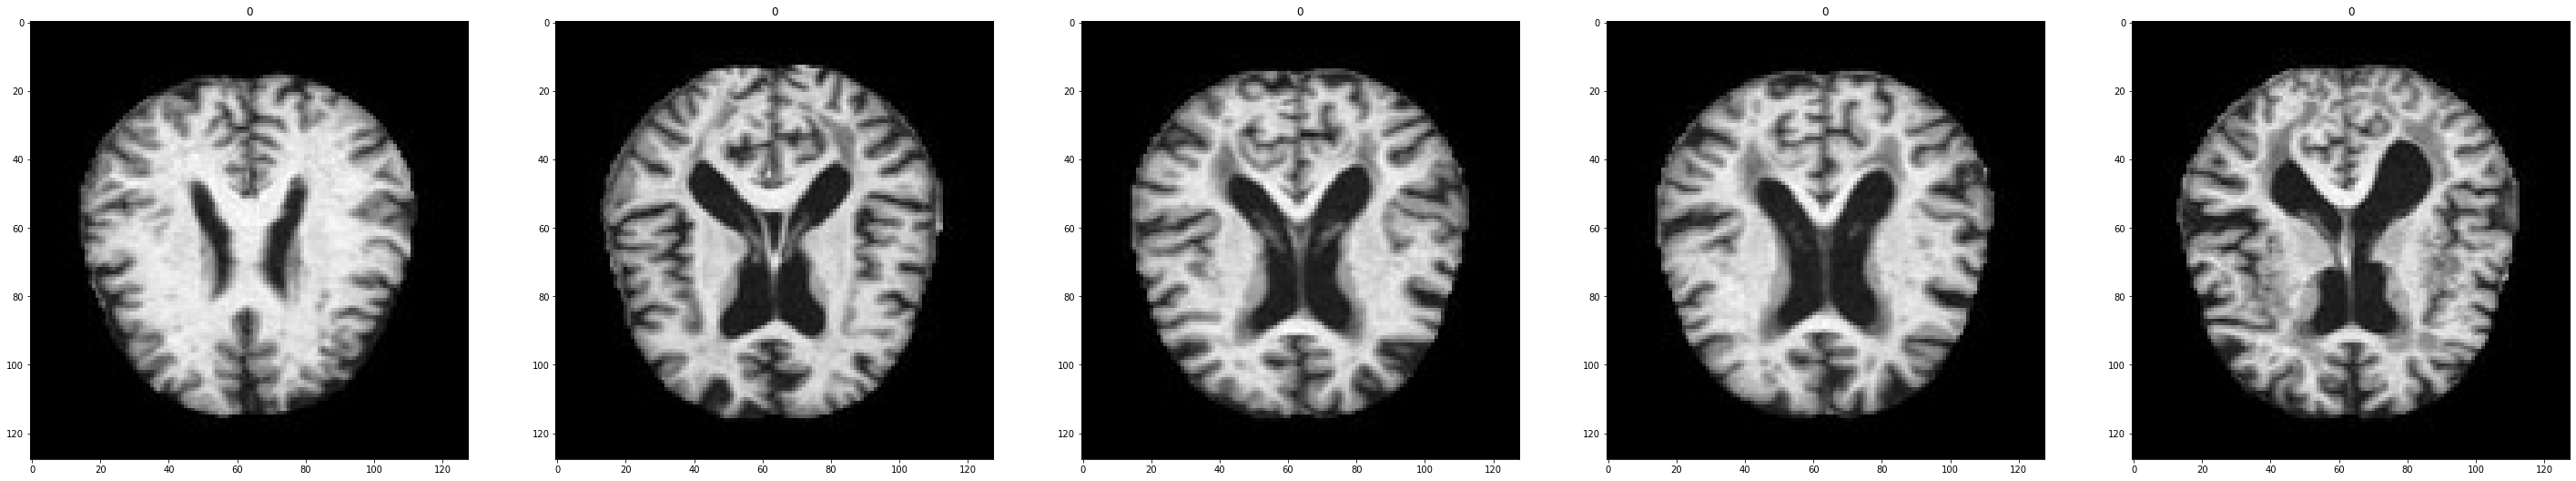

In [30]:
plt.figure(figsize=(50,50))
j=0
for i in data[:5]:
    plt.subplot(1, 5, j+1)
    plt.title(cat[0])
    plt.imshow(i)
    j+=1

In [31]:
data.shape

(6400, 128, 128, 3)

In [32]:
data = data.reshape(-1,128,128,1)
data.shape

(19200, 128, 128, 1)

In [33]:
cat = np.array(cat)

## Using a Custom made model to test our accuracy

In [34]:
print(fin_data[:5])

[(0, array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])), (0, array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0.

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(128, 128, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation="softmax"))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 75)      750       
                                                                 
 batch_normalization_3 (Batc  (None, 128, 128, 75)     300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 75)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 64, 64, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 50)      

In [38]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
# For replicable results
SEED = 0
# Size of the images is (128,128)
IMAGE_SIZE = (128, 128)
# Default batch size
BATCH_SIZE = 32
# Images are grayscale
COLOR_MODE = "grayscale"
# 20% test split
VAL_SPLIT = 0.2
data_dir = 'Dataset/'
tf.random.set_seed(SEED)
np.random.seed(SEED)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode='categorical',
    validation_split=VAL_SPLIT,
    subset="training",
    seed=SEED,
    color_mode=COLOR_MODE,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=VAL_SPLIT,
    subset="validation",
    label_mode='categorical',
    seed=SEED,
    color_mode=COLOR_MODE,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [46]:
model.fit(train_data, epochs=20, verbose=1, validation_data=valid_data)

Epoch 1/20
160/160 [==============================] - 12s 72ms/step - loss: 0.1181 - accuracy: 0.9623 - val_loss: 0.5757 - val_accuracy: 0.8813
Epoch 2/20
160/160 [==============================] - 12s 75ms/step - loss: 0.1250 - accuracy: 0.9623 - val_loss: 0.1386 - val_accuracy: 0.9594
Epoch 3/20
160/160 [==============================] - 12s 75ms/step - loss: 0.0953 - accuracy: 0.9680 - val_loss: 0.3028 - val_accuracy: 0.9195
Epoch 4/20
160/160 [==============================] - 12s 75ms/step - loss: 0.0876 - accuracy: 0.9732 - val_loss: 0.4259 - val_accuracy: 0.8734
Epoch 5/20
160/160 [==============================] - 12s 75ms/step - loss: 0.1006 - accuracy: 0.9729 - val_loss: 1.2536 - val_accuracy: 0.8484
Epoch 6/20
160/160 [==============================] - 12s 73ms/step - loss: 0.0627 - accuracy: 0.9824 - val_loss: 2.3415 - val_accuracy: 0.7133
Epoch 7/20
160/160 [==============================] - 12s 72ms/step - loss: 0.0710 - accuracy: 0.9809 - val_loss: 0.2940 - val_accuracy:

In [47]:
model.save('Model')

INFO:tensorflow:Assets written to: Model/assets


In [48]:
model.evaluate(valid_data)

40/40 [==============================] - 1s 23ms/step - loss: 0.2333 - accuracy: 0.9492


[0.23327688872814178, 0.94921875]